In [41]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Load MNIST dataset (if not already loaded)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [43]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


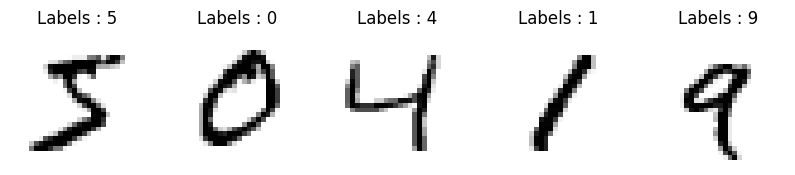

In [44]:
# Display first 5 training images
plt.figure(figsize = (10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap = "binary")
    plt.title(f"Labels : {y_train[i]}")
    plt.axis("off")
plt.show()

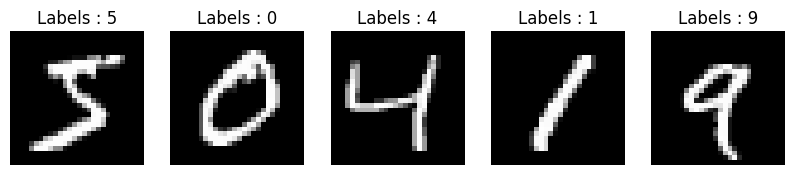

In [45]:
# Display first 5 training images
plt.figure(figsize = (10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap = "gray")
    plt.title(f"Labels : {y_train[i]}")
    plt.axis("off")
plt.show()

In [46]:
# Pre-process the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [47]:
# Load or reinitialize the model
from tensorflow.keras import models, layers, optimizers

In [48]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [49]:
# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,762 (776.41 KB)

 Trainable params: 198,122 (773.91 KB)

 Non-trainable params: 640 (2.50 KB)

In [22]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop training after 5 epochs of no improvement
    verbose=1,
    restore_best_weights=True  # Restore model to the best observed validation performance
)

In [23]:
model_checkpoint = ModelCheckpoint(
    'best_digit_recognition_model.keras',  # Filepath for saving
    monitor='val_accuracy',  # Save based on validation accuracy
    save_best_only=True,  # Only save the best model
    verbose=1
)

In [24]:
reduce_learn_rate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reduce learning rate by a factor of 0.5
    patience=3,  # Wait for 3 epochs of no improvement
    verbose=1
)

In [25]:
# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
dataGenerator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

In [27]:
dataGenerator.fit(x_train)

In [28]:
# Fit the model with callbacks
history = model.fit(
    dataGenerator.flow(x_train, y_train, batch_size=64),
    epochs=10,  # Set a higher epoch count for early stopping to take effect
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, model_checkpoint, reduce_learn_rate]
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.7722 - loss: 0.7560
Epoch 1: val_accuracy improved from -inf to 0.98800, saving model to best_digit_recognition_model.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 177s 184ms/step - accuracy: 0.7723 - loss: 0.7556 - val_accuracy: 0.9880 - val_loss: 0.0379 - learning_rate: 0.0010
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.9601 - loss: 0.1314
Epoch 2: val_accuracy improved from 0.98800 to 0.99160, saving model to best_digit_recognition_model.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 204s 187ms/step - accuracy: 0.9601 - loss: 0.1314 - val_accuracy: 0.9916 - val_loss: 0.0266 - learning_rate: 0.0010
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.9724 - loss: 0.0917
Epoch 3: val_accuracy improved from 0.99160 to 0.99310, saving model to best_digit_recognition_model.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 177s 189ms/step - accuracy: 0.9724 - loss: 0.0917 - val_accuracy: 0.9931 - val_loss: 0.0210 - learn

In [29]:
# Evaluate the best model
model.load_weights('best_digit_recognition_model.keras')  # Load the best model weights
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Final Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9934 - loss: 0.0180
Final Test Accuracy: 99.47%


In [30]:

# Save the best model again
model.save('final_digit_recognition_model.keras')